In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Evolution_DataSets.csv")
print(df.head())

                            Genus_&_Specie      Time Location      Zone  \
0              hominino Orrorin tugenencin  6.041124   Africa  oriental   
1  hominino Ardipithecus ramidus / kabadda  4.383910   Africa  oriental   
2               Australopithecus Afarensis  3.749413   Africa  oriental   
3               Australopithecus Anamensis  4.595606   Africa  oriental   
4               Australopithecus Africanus  3.614060   Africa     south   

  Current_Country         Habitat  Cranial_Capacity     Height Incisor_Size  \
0           Kenya          forest         144.51410  110.24323        small   
1        Ethiopia           mixed         293.96021  107.69018        small   
2           Kenya           mixed         264.79849  123.76644          big   
3           Kenya  forest-gallery         403.28047  111.40831          big   
4    South Africa  forest-gallery         679.15233  111.59004        small   

  Jaw_Shape  ...             biped      Arms     Foots         Diet  \
0  

In [3]:
df.shape

(12000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [5]:
df.isnull().sum()

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

In [6]:
df.describe()

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450


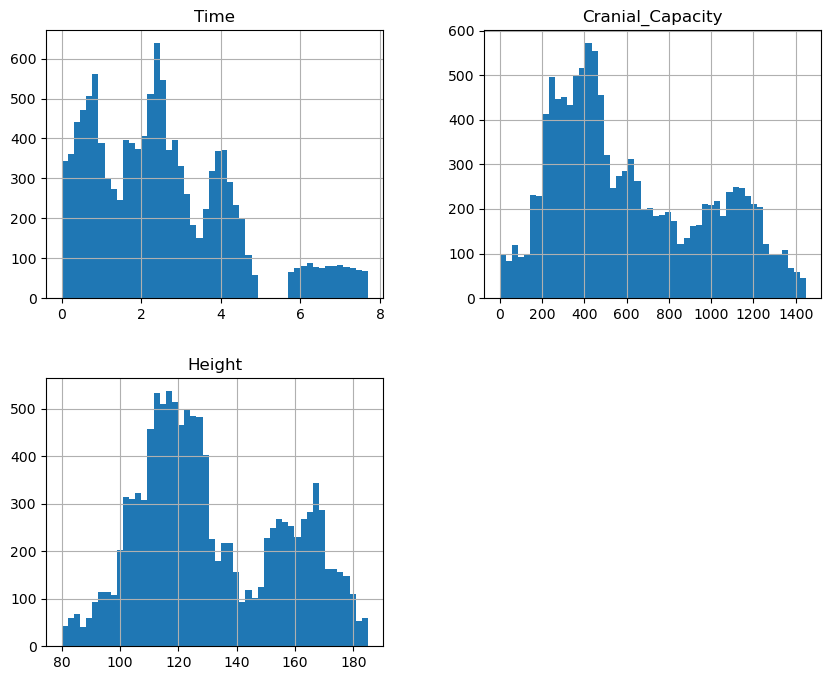

In [7]:
df.hist(bins=50,figsize=(10,8))
plt.show()

In [8]:
df=df.drop_duplicates(keep='first')

In [9]:
print(f'Count ={len(df)}')

Count =12000


In [10]:
correlation=df[['Time','Cranial_Capacity','Height']].corr()
print(correlation)

                      Time  Cranial_Capacity    Height
Time              1.000000         -0.662638 -0.594751
Cranial_Capacity -0.662638          1.000000  0.845925
Height           -0.594751          0.845925  1.000000


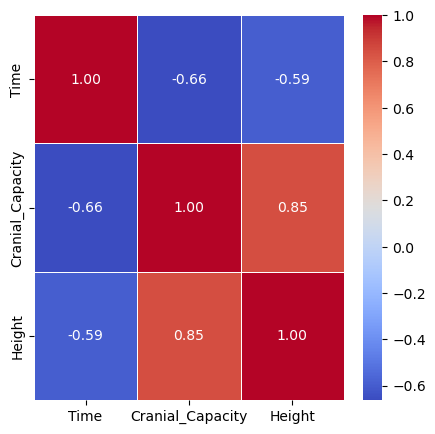

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

In [12]:
df['Genus_&_Specie'].nunique()

24

In [13]:
df['Current_Country'].value_counts()

Current_Country
Kenya               3500
Ethiopia            2500
South Africa        2000
Republic of Chad    1000
Germany             1000
Indonesia           1000
Spain                500
Georgia              500
Name: count, dtype: int64

C:\Users\Rukhsana\AppData\Local\Temp\ipykernel_31212\2621688499.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[0], palette="pastel")


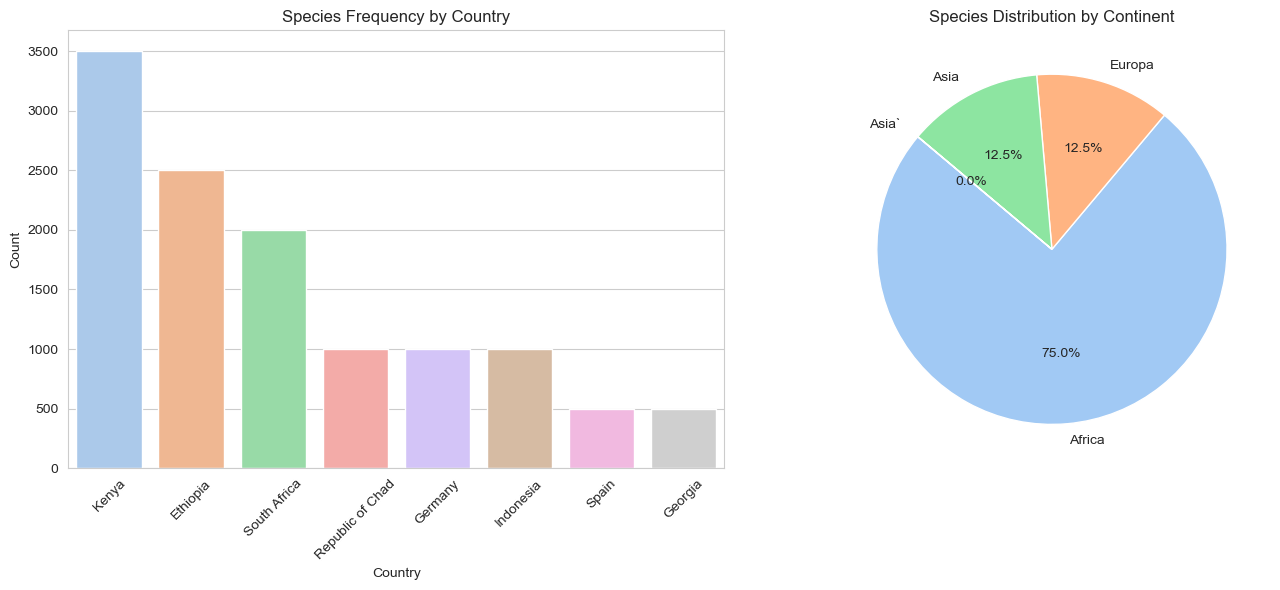

In [14]:

country_counts = df["Current_Country"].value_counts()

# Count occurrences by continent (assuming "Continent" column exists)
continent_counts = df["Location"].value_counts()

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart - Species Frequency by Country
sns.barplot(x=country_counts.index, y=country_counts.values, ax=axes[0], palette="pastel")
axes[0].set_title("Species Frequency by Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Pie Chart - Species Distribution by Continent
axes[1].pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
axes[1].set_title("Species Distribution by Continent")

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
df['Location'].value_counts()

Location
Africa    9000
Europa    1500
Asia      1499
Asia`        1
Name: count, dtype: int64

In [16]:
df['Zone'].value_counts()

Zone
oriental    6500
south       2000
central     2000
west        1500
Name: count, dtype: int64

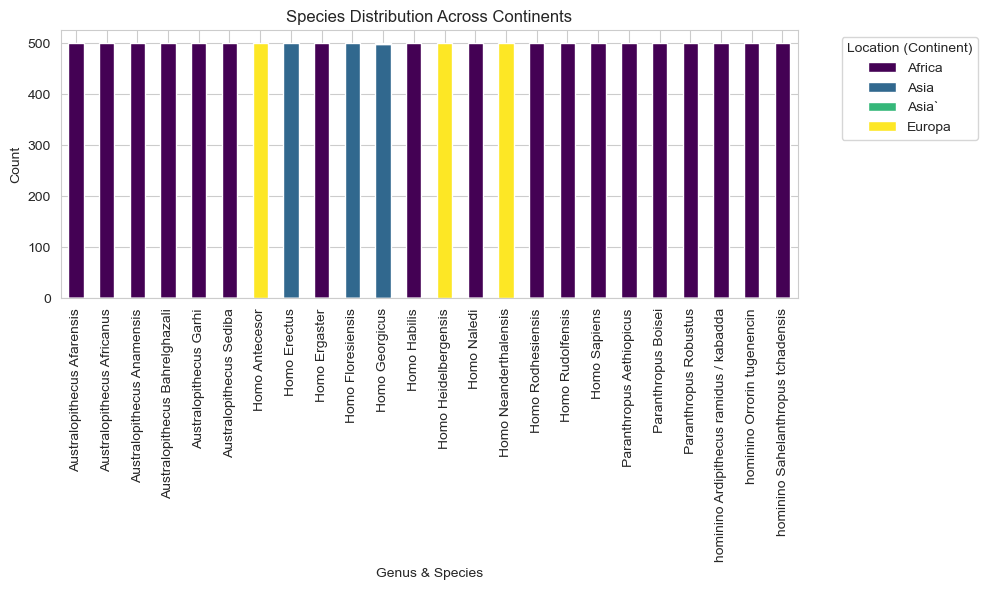

In [17]:


# Count occurrences of each species in each location (continent)
species_location_counts = df.groupby(["Genus_&_Specie", "Location"]).size().unstack(fill_value=0)

# Plot histogram for species distribution across continents
species_location_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

# Customize the plot
plt.title("Species Distribution Across Continents")
plt.xlabel("Genus & Species")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Location (Continent)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


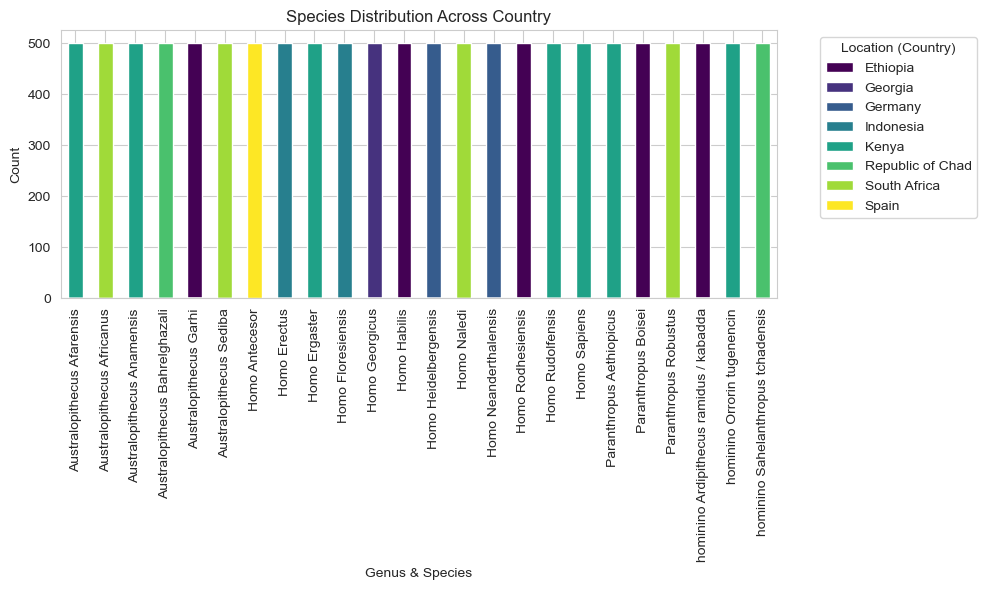

In [18]:

# Count occurrences of each species in each location (continent)
species_location_counts = df.groupby(["Genus_&_Specie","Current_Country"]).size().unstack(fill_value=0)

# Plot histogram for species distribution across continents
species_location_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")

# Customize the plot
plt.title("Species Distribution Across Country")
plt.xlabel("Genus & Species")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Location (Country)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

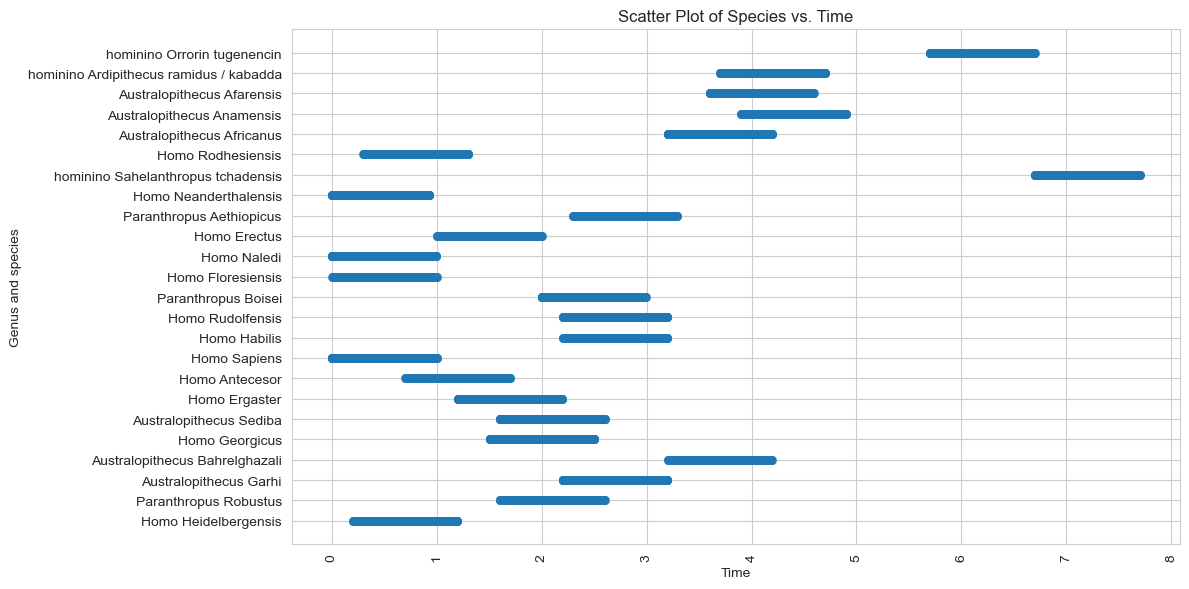

In [19]:

# Set plot style
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["Time"], y=df["Genus_&_Specie"], alpha=0.7, edgecolor=None)

# Customize the plot
plt.title("Scatter Plot of Species vs. Time")
plt.xlabel("Time")
plt.ylabel("Genus and species")
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


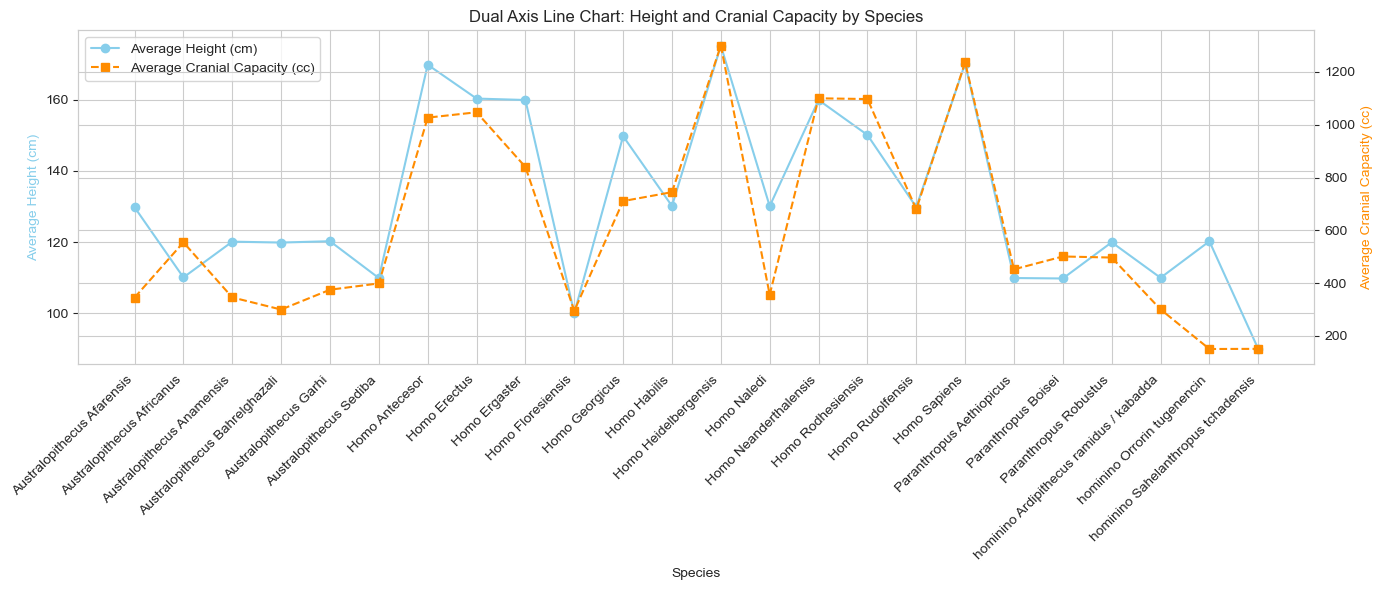

In [ ]:

# Group by species and compute average values
avg_df = df.groupby('Genus_&_Specie')[['Height', 'Cranial_Capacity']].mean().dropna().reset_index()

# Sort species alphabetically (or by any other feature if preferred)
avg_df = avg_df.sort_values(by="Genus_&_Specie")

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# Plot average height (left Y-axis)
line1 = ax1.plot(avg_df['Genus_&_Specie'], avg_df['Height'],
                 color='skyblue', marker='o', label='Average Height (cm)')

# Plot cranial capacity (right Y-axis)
line2 = ax2.plot(avg_df['Genus_&_Specie'], avg_df['Cranial_Capacity'],
                 color='darkorange', marker='s', linestyle='--', label='Average Cranial Capacity (cc)')

# Set X-axis ticks and labels
ax1.set_xticks(range(len(avg_df)))
ax1.set_xticklabels(avg_df['Genus_&_Specie'], rotation=45, ha='right')

# Axis labels and title
ax1.set_xlabel("Species")
ax1.set_ylabel("Average Height (cm)", color='skyblue')
ax2.set_ylabel("Average Cranial Capacity (cc)", color='darkorange')
plt.title("Dual Axis Line Chart: Height and Cranial Capacity by Species")

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Final layout
plt.tight_layout()
plt.show()

